In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [21]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.6961 - loss: 0.8281 - val_accuracy: 0.8495 - val_loss: 0.4118
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8409 - loss: 0.4403 - val_accuracy: 0.8657 - val_loss: 0.3608
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.8622 - loss: 0.3822 - val_accuracy: 0.8887 - val_loss: 0.3056
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.8711 - loss: 0.3518 - val_accuracy: 0.8927 - val_loss: 0.2930
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8830 - loss: 0.3273 - val_accuracy: 0.8934 - val_loss: 0.2903
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.8875 - loss: 0.3062 - val_accuracy: 0.8992 - val_loss: 0.2745
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.8894 - loss: 0.2980 - val_accuracy: 0.9026 - val_loss: 0.2638
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.8937 -

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9076 - loss: 0.2598
Test Accuracy: 90.96%


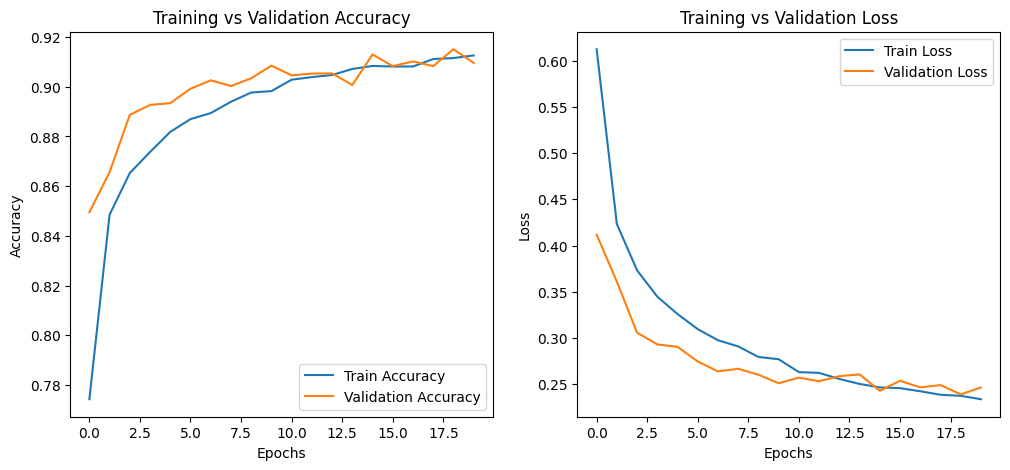

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [37]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(28, 28, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

ValueError: Input size must be at least 32x32; Received: input_shape=(28, 28, 3)

In [31]:
X_train_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train))
X_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))

In [32]:
vgg_model = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

NameError: name 'vgg16_base' is not defined

In [38]:
vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

NameError: name 'vgg_model' is not defined

In [34]:
vgg_history = vgg_model.fit(X_train_rgb, y_train, epochs=20, batch_size=32,
                            validation_data=(X_test_rgb, y_test))

NameError: name 'vgg_model' is not defined

In [35]:
test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(X_test_rgb, y_test)
print(f"Test Accuracy with VGG16: {test_accuracy_vgg * 100:.2f}%")

NameError: name 'vgg_model' is not defined

In [36]:
print(f"Accuracy of CNN: {test_accuracy * 100:.2f}%")
print(f"Accuracy of VGG16-based model: {test_accuracy_vgg * 100:.2f}%")

Accuracy of CNN: 90.96%


NameError: name 'test_accuracy_vgg' is not defined